In [1]:
pip  install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing python libraries
import pandas as pd


In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df=df[:10]


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['sentiment'].value_counts()

positive    7
negative    3
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

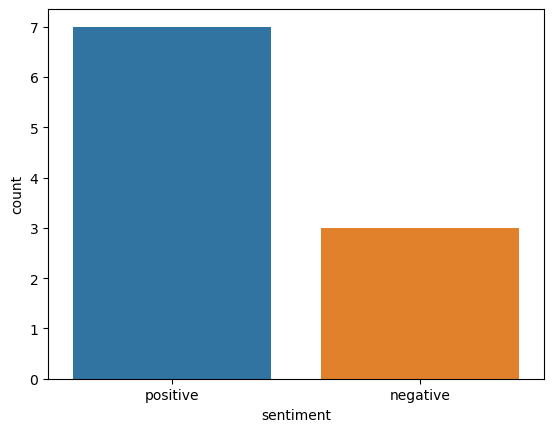

In [6]:
import seaborn as sns
sns.countplot (x= 'sentiment', data =df)

In [7]:
positive_review =list(df[df['sentiment']=='positive']['review'])
negative_review=list(df[df['sentiment']=='negative']['review'])

In [8]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt

In [9]:
def create_cloud (string, title =None):
    cloud=WordCloud(height=1080,
                   width = 1920,
                   background_color='red',
                   min_font_size =10,
                stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud,interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title,fontdict={'fontsize':24})
    plt.show()  
    

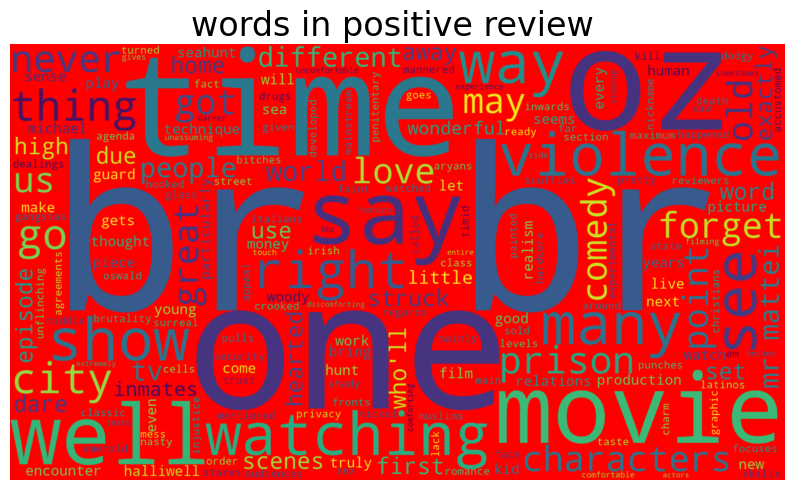

In [44]:
create_cloud(' '.join(positive_review).lower(),'words in positive review ')

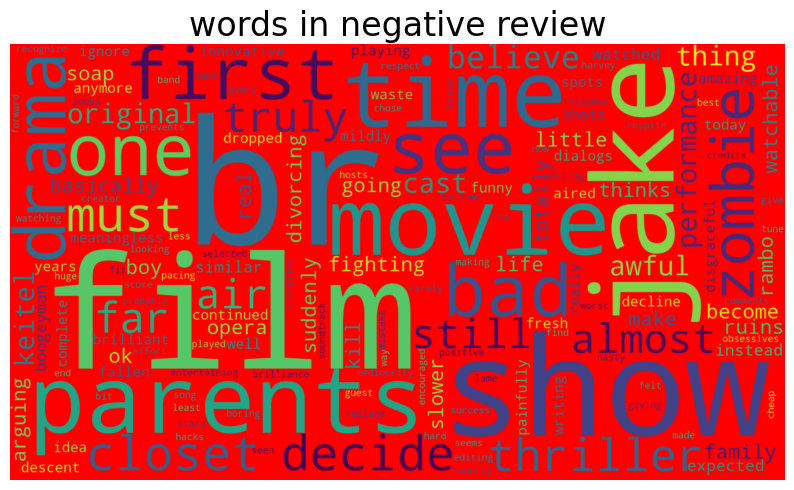

In [43]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

In [42]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words))
    list2.append(' '.join(list1))
    return(list2)

In [13]:
x=text_processing(df)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 807.51it/s]


In [14]:
df['cleaned_review']=x

In [15]:
df_x=df['review']
df_y=df['sentiment']

In [16]:
df_x.shape

(10,)

In [17]:
df_y.shape

(10,)